# In this notebook, we will examine lightning strike data collected by the National Oceanic and Atmospheric Association (NOAA) for the year of 2018. To complete this notebook, we will:

Find the locations with the greatest number of strikes within a single day
Examine the locations that had the greatest number of days with at least one lightning strike
Determine whether certain days of the week had more lightning strikes than others
Add data from 2016 and 2017 and, for each month, calculate the percentage of total lightning strikes for that year that occurred in that month
Plot this data on a bar graph

In [3]:
!mamba install pandas

mambajs 0.19.13

Specs: xeus-python, numpy, matplotlib, pillow, ipywidgets>=8.1.6, ipyleaflet, scipy, pandas
Channels: emscripten-forge, conda-forge

Solving environment...
Solving took 1.103 seconds
  Name                          Version                       Build                         Channel                       
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
+ pandas                        2.3.3                         np22py313h9d9dc1e_0           emscripten-forge              
+ python-tzdata                 2025.3                        pyhd8ed1ab_0                  conda-forge                   
- pip                           25.3                          pyh145f28c_0                  conda-forge                   


In [5]:
!mamba install seaborn

mambajs 0.19.13

Specs: xeus-python, numpy, matplotlib, pillow, ipywidgets>=8.1.6, ipyleaflet, scipy, pandas, seaborn
Channels: emscripten-forge, conda-forge

Solving environment...
Solving took 0.7916999999284744 seconds
  Name                          Version                       Build                         Channel                       
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
+ patsy                         1.0.2                         py313h1804a44_0               emscripten-forge              
+ seaborn                       0.13.2                        hd8ed1ab_3                    conda-forge                   
+ seaborn-base                  0.13.2                        pyhd8ed1ab_3                  conda-forge                   
+ statsmodels                   0.14.6                        np22py313h3cf259a_0           emscripten-forge              


In [6]:
# Import statements
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from matplotlib import pyplot as plt

In [7]:
# Organize the data
# Read in the  data.
df = pd.read_csv('NOAA LS.csv') 
df.head()

,date,number_of_strikes,center_point_geom
0,2016-08-05,16,POINT(-101.5 24.7)
1,2016-08-05,16,POINT(-85 34.3)
2,2016-08-05,16,POINT(-89 41.4)
3,2016-08-05,16,POINT(-89.8 30.7)
4,2016-08-05,16,POINT(-86.2 37.9)


In [8]:
# Convert the `date` column to datetime.
df['date'] = pd.to_datetime(df['date'])

In [20]:
#Filter the date for year '2018'
df_2018 = df[df['date'].dt.year == 2018].copy()
df_2018.head()

,date,number_of_strikes,center_point_geom
18965,2018-05-27,13,POINT(-81.1 22.8)
18966,2018-05-27,13,POINT(-108.6 42.8)
18967,2018-05-27,13,POINT(-104.6 41.8)
18968,2018-05-27,13,POINT(-81.3 24.8)
18969,2018-05-27,13,POINT(-105.3 43.6)


In [39]:
#Filter the date for year '2017'
df_2017 = df[df['date'].dt.year == 2017].copy()
df_2017.head()

,date,number_of_strikes,center_point_geom
103231,2017-01-01,50,POINT(-93 28.1)
103232,2017-01-01,27,POINT(-113.2 34.2)
103233,2017-01-01,36,POINT(-89.6 30)
103234,2017-01-01,46,POINT(-92.3 29.7)
103235,2017-01-01,46,POINT(-92.9 28.3)


In [21]:
#let's check the shape of the dataframe.
df_2018.shape

(845230, 3)

In [22]:
#Check for duplicates. If the shape of the data is different after running this code, you will know there were duplicate rows.
df_2018.drop_duplicates().shape

(845230, 3)

# Locations with most strikes in a single day

In [23]:
## Sort by number of strikes in descending order.
df_2018.sort_values(by = 'number_of_strikes', ascending = False).head()

,date,number_of_strikes,center_point_geom
2167347,2018-08-20,2211,POINT(-92.5 35.5)
70627,2018-08-16,1902,POINT(-96.2 36.1)
43963,2018-02-10,1899,POINT(-95.5 28.1)
1092942,2018-02-25,1833,POINT(-98.7 28.9)
1118721,2018-08-17,1767,POINT(-90.1 36)


# Locations with most days with at least one lightning strike

In [24]:
# Identify the locations that appear most in the dataset.
df_2018['center_point_geom'].value_counts()

center_point_geom
POINT(-82.8 22.8)     37
POINT(-107 26.2)      35
POINT(-81.6 22.3)     34
POINT(-81.6 22.5)     34
POINT(-106.9 25.7)    33
                      ..
POINT(-62.6 44.7)      1
POINT(-66.5 45.1)      1
POINT(-66 47.5)        1
POINT(-63.5 43.3)      1
POINT(-106.3           1
Name: count, Length: 150454, dtype: int64

In [16]:
df_2018.center_point_geom.value_counts()

center_point_geom
POINT(-82.8 22.8)     37
POINT(-107 26.2)      35
POINT(-81.6 22.3)     34
POINT(-81.6 22.5)     34
POINT(-106.9 25.7)    33
                      ..
POINT(-62.6 44.7)      1
POINT(-66.5 45.1)      1
POINT(-66 47.5)        1
POINT(-63.5 43.3)      1
POINT(-106.3           1
Name: count, Length: 150454, dtype: int64

In [25]:
# Identify the top 20 locations with most days of lightning.
df_2018.center_point_geom.value_counts()[:20].rename_axis('unique_values').reset_index().style.background_gradient()

,unique_values,count
0,POINT(-82.8 22.8),37
1,POINT(-107 26.2),35
2,POINT(-81.6 22.3),34
3,POINT(-81.6 22.5),34
4,POINT(-106.9 25.7),33
5,POINT(-83.8 22.6),33
6,POINT(-81 22.4),33
7,POINT(-76.2 20.2),33
8,POINT(-83.3 22.8),33
9,POINT(-77.2 20.6),32


In [26]:
# Create two new columns.
df_2018['week'] = df_2018.date.dt.isocalendar().week
df_2018['weekday'] = df_2018.date.dt.day_name()
df_2018.head()

,date,number_of_strikes,center_point_geom,week,weekday
18965,2018-05-27,13,POINT(-81.1 22.8),21,Sunday
18966,2018-05-27,13,POINT(-108.6 42.8),21,Sunday
18967,2018-05-27,13,POINT(-104.6 41.8),21,Sunday
18968,2018-05-27,13,POINT(-81.3 24.8),21,Sunday
18969,2018-05-27,13,POINT(-105.3 43.6),21,Sunday


In [27]:
# Calculate the mean count of lightning strikes for each weekday.
df_2018[['weekday', 'number_of_strikes']].groupby(['weekday']).mean()

,number_of_strikes
weekday,
Friday,15.077987
Monday,14.894793
Saturday,14.385895
Sunday,13.778985
Thursday,14.840740
Tuesday,15.555677
Wednesday,15.054433


It seems that Saturday and Sunday have fewer lightning strikes on average than the other five weekdays. We will plot the distributions of the strike counts for each day of the week. We want each distribution to be represented as a boxplot.

We will begin by defining the order of the days, starting with Monday and ending with Sunday. This is how the days will be ordered in the plot we create.

In [28]:
# Define order of days for the plot.
weekday_order = ['Monday','Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday']

Now, we will code the plot. Remember that showfliers is the parameter that controls whether or not outliers are displayed in the plot. If we input True, outliers are included; if we input False, outliers are left off of the box plot. Keep in mind, we aren’t deleting any outliers from the dataset when we create this chart—we are only excluding them from the visualization.

/tmp/xpython_42/315192064.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.boxplot( data = df_2018,


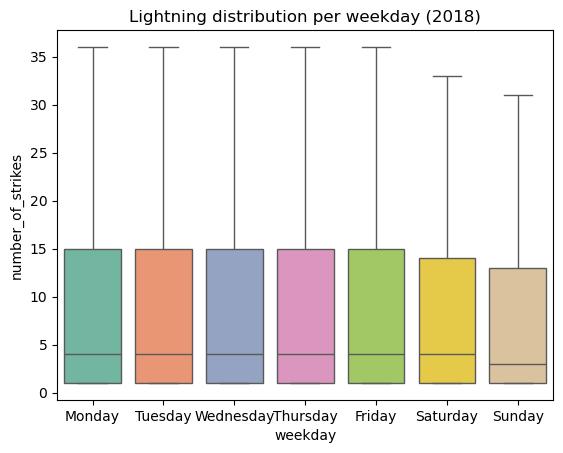

In [34]:
# Create boxplots of strike counts for each day of week.
g = sns.boxplot( data = df_2018,
                 x='weekday',
                 y= 'number_of_strikes',
                 order = weekday_order,
                 showfliers = False,
                 palette='Set2' # or 'Set3', 'Pastel1', 'tab10', etc.
                );
g.set_title('Lightning distribution per weekday (2018)');


Notice that the median remains the same on all of the days of the week. As for Saturday and Sunday, however, the distributions are both lower than they are during the rest of the week. We also know that the mean numbers of strikes that occurred on Saturday and Sunday were lower than on the other weekdays. Why might this be? Perhaps the aerosol particles emitted by factories and vehicles increase the likelihood of lightning strikes. In the U.S., Saturday and Sunday are days that many people don't work, so there may be fewer factories operating and fewer cars on the road. This is only speculation, but it's one possible path for further exploration.

## Monthly lightning strikes 2016–2018

In [40]:
# Import 2017 data
df_2017 = df[df['date'].dt.year == 2017].copy()
df_2017.head()

,date,number_of_strikes,center_point_geom
103231,2017-01-01,50,POINT(-93 28.1)
103232,2017-01-01,27,POINT(-113.2 34.2)
103233,2017-01-01,36,POINT(-89.6 30)
103234,2017-01-01,46,POINT(-92.3 29.7)
103235,2017-01-01,46,POINT(-92.9 28.3)


In [41]:
# Convert `date` column to datetime.
df_2017['date'] = pd.to_datetime(df_2017['date'])

In [43]:
# Create a new dataframe combining 2017 data with 2018 data.
union_df = pd.concat([df_2018.drop(['weekday','week'], axis = 1), df_2017], ignore_index = True)
union_df.head()

,date,number_of_strikes,center_point_geom
0,2018-05-27,13,POINT(-81.1 22.8)
1,2018-05-27,13,POINT(-108.6 42.8)
2,2018-05-27,13,POINT(-104.6 41.8)
3,2018-05-27,13,POINT(-81.3 24.8)
4,2018-05-27,13,POINT(-105.3 43.6)


In [44]:
# Add 3 new columns.
union_df['year'] = union_df.date.dt.year
union_df['month'] = union_df.date.dt.month
union_df['month_txt'] = union_df.date.dt.month_name()
union_df.head()

,date,number_of_strikes,center_point_geom,year,month,month_txt
0,2018-05-27,13,POINT(-81.1 22.8),2018,5,May
1,2018-05-27,13,POINT(-108.6 42.8),2018,5,May
2,2018-05-27,13,POINT(-104.6 41.8),2018,5,May
3,2018-05-27,13,POINT(-81.3 24.8),2018,5,May
4,2018-05-27,13,POINT(-105.3 43.6),2018,5,May


In [46]:
# Calculate total number of strikes per year
union_df[['year','number_of_strikes']].groupby('year').sum()

,number_of_strikes
year,
2017,9185799
2018,12503142


In [50]:
# Calculate total lightning strikes for each month of each year.
strikes_by_month = union_df[['year','month_txt','number_of_strikes']].groupby(['month_txt','year']).sum().reset_index()


strikes_by_month.head()

,month_txt,year,number_of_strikes
0,April,2017,1041661
1,April,2018,415248
2,August,2017,1550735
3,August,2018,4469094
4,December,2017,72537


In [54]:
# Calculate total lightning strikes for each year.

strikes_by_year = union_df.groupby(['year']).agg(
    year_strikes =  pd.NamedAgg(column = 'number_of_strikes', aggfunc = 'sum')).reset_index()

strikes_by_year.head()

,year,year_strikes
0,2017,9185799
1,2018,12503142


In [55]:
# Combine `lightning_by_month` and `lightning_by_year` dataframes into single dataframe.
percentage_lightning = strikes_by_month.merge(strikes_by_year, on = 'year')
percentage_lightning.head()

,month_txt,year,number_of_strikes,year_strikes
0,April,2017,1041661,9185799
1,April,2018,415248,12503142
2,August,2017,1550735,9185799
3,August,2018,4469094,12503142
4,December,2017,72537,9185799


In [56]:
# Create new `percentage_lightning_per_month` column.
percentage_lightning['percentage_lightning_per_month'] = (percentage_lightning.number_of_strikes / percentage_lightning.year_strikes * 100) 
percentage_lightning.head()


,month_txt,year,number_of_strikes,year_strikes,percentage_lightning_per_month
0,April,2017,1041661,9185799,11.339906
1,April,2018,415248,12503142,3.321149
2,August,2017,1550735,9185799,16.881874
3,August,2018,4469094,12503142,35.743767
4,December,2017,72537,9185799,0.789665


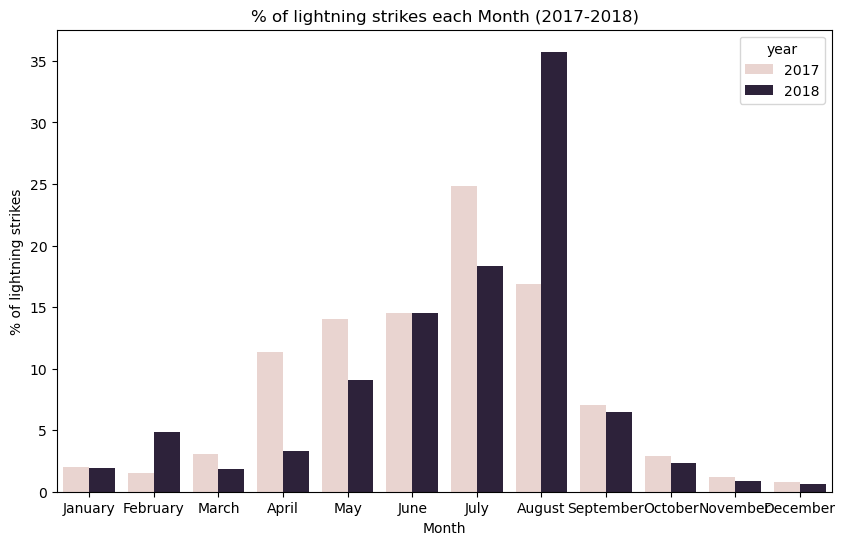

In [61]:
# plot the percentages by month in a bar graph.
plt.figure(figsize=(10,6));
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

sns.barplot(
    data = percentage_lightning,
    x = 'month_txt',
    y = 'percentage_lightning_per_month',
    hue = 'year',
    order = month_order );
plt.xlabel("Month");
plt.ylabel("% of lightning strikes");
plt.title("% of lightning strikes each Month (2017-2018)");

In [ ]:
#Combine Data
#df.merge() to take columns or indices from other dataframes and combine them with the one to which you’re applying the method.
df1.merge(df2, how=‘inner’, on=[‘month’,’year’])

In [ ]:
#Use pd.concat() to join columns, rows, or dataframes along a particular axis
df3 = pd.concat([df1.drop(['column_1','column_2'], axis=1), df2])

In [1]:
#df.join() to combine columns with another dataframe either on an index or on a key column. Efficiently join multiple
#DataFrame objects by index at once by passing a list.
df1.set_index('key').join(df2.set_index('key'))


<class 'NameError'>: name 'df1' is not defined

In [ ]:
#df.select_dtypes() to return a subset of the dataframe’s columns based on the column dtypes (e.g., float64, int64, bool, object, etc.)
df2 = df.select_dtypes(include=['int64'])
df2

In [ ]:
#Filter data
df[df['class']=='Aves']

In [ ]:
#Sort data
df.sort_values(by=['legs'], ascending=False)

In [ ]:
# Slice data
df.iloc[5:10, 2:] 	                → selects only rows 5 through 9, at columns 2+ 

df.iloc[5:10] 		                        → selects only rows 5 through 9, all columns
df.iloc[1, 2] 		                        → selects value at row 1, column 2
df.iloc[[0, 2], [2, 4]] 	→ selects only rows 0 and 2, at columns 2 and 4

In [ ]:
#df.loc[] to slice a dataframe based on a label or Boolean array.
df.loc[:, ['color', 'class']]